In [211]:
import cv2
import numpy as np 
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from matplotlib import pyplot as plt

In [212]:
img_path = r'C:\Users\liu\Desktop\pictures\0849.png'
cv2_img = cv2.imread(img_path)
img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

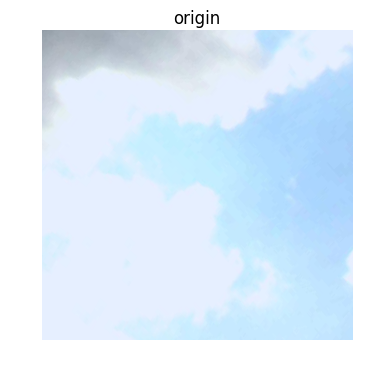

In [213]:
plt.imshow(img)
plt.title('origin')
plt.axis("off")
plt.show()

In [214]:
segments = slic(img_as_float(img), n_segments = 300, sigma = 5)

In [215]:
img_float = img_as_float(img)

In [216]:
r, g, b = cv2.split(img_float)

In [217]:
row, col = img.shape[0], img.shape[1]

In [218]:
res = np.zeros((row,col))

In [219]:
sum_r_list = np.zeros((np.max(segments)+1, 1))
sum_b_list = np.zeros((np.max(segments)+1, 1))

In [220]:
for i in range(row):
    for j in range(col):
        label = segments[i][j]
        sum_r_list[label] += r[i][j]
        sum_b_list[label] += b[i][j]

In [221]:
r_b_list = sum_b_list / sum_r_list

In [222]:
for i in range(row):
    for j in range(col):
        label = segments[i][j]
        if r_b_list[label] < 1.4:
            res[i][j] = 255
        else:
            res[i][j] = 0

In [170]:
fig = plt.figure("Superpixel")
plt.imshow(res, cmap='gray')
plt.title('SLIC + B / R')
plt.axis("off")
plt.show()
# plt.savefig('foo.png')

In [223]:
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1,1,1)
sp = mark_boundaries(img_float, segments, outline_color=True)
ax.imshow(sp)
plt.imshow(sp)
plt.axis("off")
# plt.show()
plt.savefig('foo.png')